In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #For stemming
from nltk.stem import WordNetLemmatizer #For Lemmetization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
punc = '''!()0123456789-'[]{};:'"\,<>./?@#$%^&*_~'''
ps = PorterStemmer()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data = pd.read_csv("/content/Corona_NLP_train.csv",encoding="latin-1")

In [ ]:
data.isnull()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
41152,False,False,False,False,False,False
41153,False,False,True,False,False,False
41154,False,False,True,False,False,False
41155,False,False,True,False,False,False


In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
...,...,...,...,...,...,...
41147,False,False,False,False,False,False
41149,False,False,False,False,False,False
41150,False,False,False,False,False,False
41152,False,False,False,False,False,False


In [ ]:
data["Sentiment"].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

In [ ]:
data['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
5        As news of the regionÂs first confirmed COVID...
6        Cashier at grocery store was sharing his insig...
                               ...                        
41147    YÂall really shitting that much more at home?...
41149    Still shocked by the number of #Toronto superm...
41150    I never that weÂd be in a situation &amp; wor...
41152    Airline pilots offering to stock supermarket s...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 32567, dtype: object

##below is preprocessing of tweets

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

#adding extra feature called clean_tweets and dropping original one

In [ ]:
data['clean_tweets'] = data['OriginalTweet'].apply(transform_text)

In [ ]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi chrisitv http http http
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news first confirm case came sullivan counti l...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier groceri store share insight prove cred...
...,...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative,realli shit much home covid19 coronaviru toile...
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative,still shock number toronto supermarket employe...
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,never situat amp world go supermarket pick pac...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airlin pilot offer stock supermarket shelv nz ...


##lets visulaize the dataset checking data is balance or not

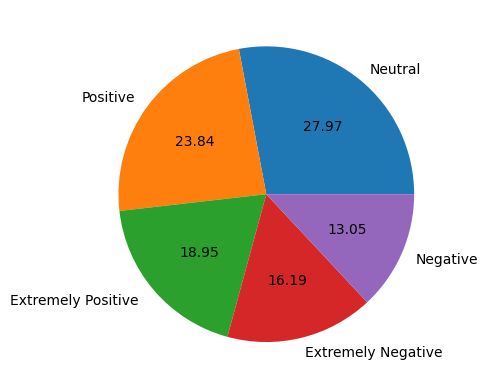

In [ ]:
classes=['Neutral','Positive','Extremely Positive ','Extremely Negative' ,'Negative']
plt.pie(data['Sentiment'].value_counts(), labels=classes,autopct="%0.2f")
plt.show()

In [ ]:
df=data.copy()

In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi chrisitv http http http
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news first confirm case came sullivan counti l...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier groceri store share insight prove cred...
...,...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative,realli shit much home covid19 coronaviru toile...
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative,still shock number toronto supermarket employe...
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,never situat amp world go supermarket pick pac...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airlin pilot offer stock supermarket shelv nz ...


In [ ]:
df.drop(columns=["UserName","ScreenName","OriginalTweet"],axis=1,inplace=True)

<Axes: xlabel='Sentiment'>

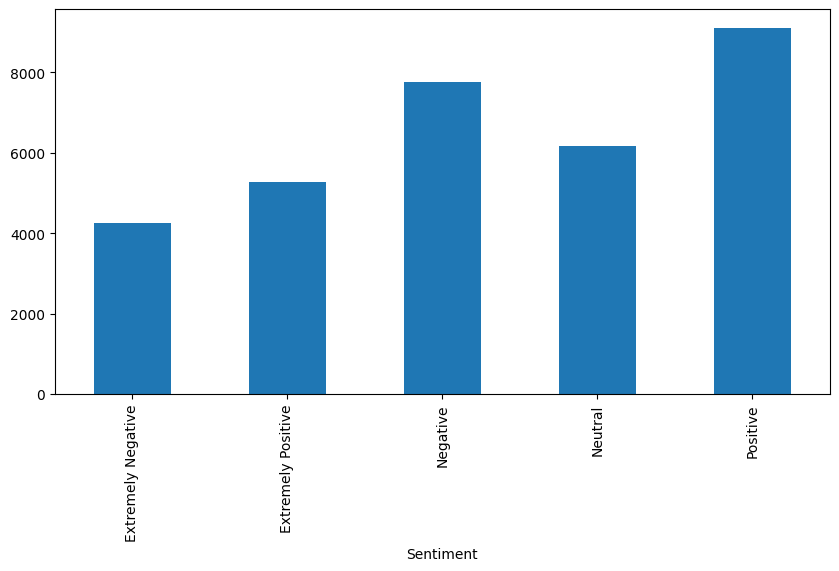

In [ ]:
counts = df.groupby("Sentiment")["Sentiment"].agg("count")

fig, ax = plt.subplots(figsize=(10,5))
counts.plot.bar()

In [ ]:
df

,Location,TweetAt,Sentiment,clean_tweets
0,London,16-03-2020,Neutral,menyrbi chrisitv http http http
1,UK,16-03-2020,Positive,advic talk neighbour famili exchang phone numb...
2,Vagabonds,16-03-2020,Positive,coronaviru australia woolworth give elderli di...
5,"ÃT: 36.319708,-82.363649",16-03-2020,Positive,news first confirm case came sullivan counti l...
6,"35.926541,-78.753267",16-03-2020,Positive,cashier groceri store share insight prove cred...
...,...,...,...,...
41147,"Brooklyn, NY",14-04-2020,Negative,realli shit much home covid19 coronaviru toile...
41149,"Toronto, Ontario",14-04-2020,Negative,still shock number toronto supermarket employe...
41150,OHIO,14-04-2020,Positive,never situat amp world go supermarket pick pac...
41152,"Wellington City, New Zealand",14-04-2020,Neutral,airlin pilot offer stock supermarket shelv nz ...


#lets see the length of words and number of character in each tweets to undersatnd the pattern of sentiments.

In [ ]:
df['numberof_words'] = df['clean_tweets'].apply(lambda x:len(nltk.word_tokenize(x)))
df['numberof_characters'] = df['clean_tweets'].apply(len)
df['numberof_sentences'] = df['clean_tweets'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(5)

,Location,TweetAt,Sentiment,clean_tweets,numberof_words,numberof_characters,numberof_sentences
0,London,16-03-2020,Neutral,menyrbi chrisitv http http http,5,31,1
1,UK,16-03-2020,Positive,advic talk neighbour famili exchang phone numb...,27,174,1
2,Vagabonds,16-03-2020,Positive,coronaviru australia woolworth give elderli di...,12,85,1
5,"ÃT: 36.319708,-82.363649",16-03-2020,Positive,news first confirm case came sullivan counti l...,24,144,1
6,"35.926541,-78.753267",16-03-2020,Positive,cashier groceri store share insight prove cred...,13,84,1


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['lables']= label_encoder.fit_transform(df['Sentiment'])


In [ ]:
df

,Location,TweetAt,Sentiment,clean_tweets,numberof_words,numberof_characters,numberof_sentences,lables
0,London,16-03-2020,Neutral,menyrbi chrisitv http http http,5,31,1,3
1,UK,16-03-2020,Positive,advic talk neighbour famili exchang phone numb...,27,174,1,4
2,Vagabonds,16-03-2020,Positive,coronaviru australia woolworth give elderli di...,12,85,1,4
5,"ÃT: 36.319708,-82.363649",16-03-2020,Positive,news first confirm case came sullivan counti l...,24,144,1,4
6,"35.926541,-78.753267",16-03-2020,Positive,cashier groceri store share insight prove cred...,13,84,1,4
...,...,...,...,...,...,...,...,...
41147,"Brooklyn, NY",14-04-2020,Negative,realli shit much home covid19 coronaviru toile...,7,50,1,2
41149,"Toronto, Ontario",14-04-2020,Negative,still shock number toronto supermarket employe...,15,111,1,2
41150,OHIO,14-04-2020,Positive,never situat amp world go supermarket pick pac...,17,118,1,4
41152,"Wellington City, New Zealand",14-04-2020,Neutral,airlin pilot offer stock supermarket shelv nz ...,9,59,1,3


<ipython-input-28-08c09bf938e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()
<ipython-input-28-08c09bf938e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

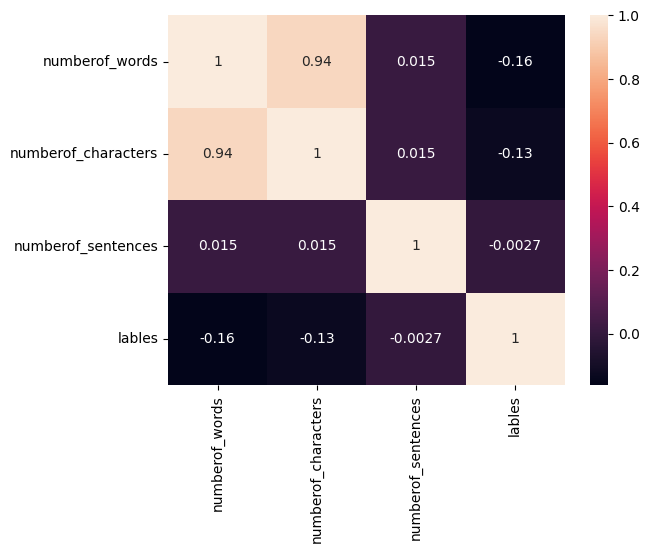

In [ ]:
cor=df.corr()
sns.heatmap(df.corr(),annot=True)


## u can see txt length and number words also not affecting the lables very less correalation

##now Lets see the correaltion between date and labels

In [ ]:
df["TweetAt"] = pd.to_datetime(df["TweetAt"], errors='coerce',utc=False)
df['Year'] = df['TweetAt'].dt.year
df['month'] = df['TweetAt'].dt.month
df['day'] = df['TweetAt'].dt.day


<ipython-input-29-e3bca52c3967>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["TweetAt"] = pd.to_datetime(df["TweetAt"], errors='coerce',utc=False)


In [ ]:
df

,Location,TweetAt,Sentiment,clean_tweets,numberof_words,numberof_characters,numberof_sentences,lables,Year,month,day
0,London,2020-03-16,Neutral,menyrbi chrisitv http http http,5,31,1,3,2020,3,16
1,UK,2020-03-16,Positive,advic talk neighbour famili exchang phone numb...,27,174,1,4,2020,3,16
2,Vagabonds,2020-03-16,Positive,coronaviru australia woolworth give elderli di...,12,85,1,4,2020,3,16
5,"ÃT: 36.319708,-82.363649",2020-03-16,Positive,news first confirm case came sullivan counti l...,24,144,1,4,2020,3,16
6,"35.926541,-78.753267",2020-03-16,Positive,cashier groceri store share insight prove cred...,13,84,1,4,2020,3,16
...,...,...,...,...,...,...,...,...,...,...,...
41147,"Brooklyn, NY",2020-04-14,Negative,realli shit much home covid19 coronaviru toile...,7,50,1,2,2020,4,14
41149,"Toronto, Ontario",2020-04-14,Negative,still shock number toronto supermarket employe...,15,111,1,2,2020,4,14
41150,OHIO,2020-04-14,Positive,never situat amp world go supermarket pick pac...,17,118,1,4,2020,4,14
41152,"Wellington City, New Zealand",2020-04-14,Neutral,airlin pilot offer stock supermarket shelv nz ...,9,59,1,3,2020,4,14


In [ ]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,numberof_words,numberof_characters,numberof_sentences,lables,Year,month,day
numberof_words,1.000000,0.938840,0.015461,-0.160934,NaN,-0.021408,0.003976
numberof_characters,0.938840,1.000000,0.015485,-0.126245,NaN,-0.021486,0.009415
numberof_sentences,0.015461,0.015485,1.000000,-0.002719,NaN,-0.003706,0.007208
lables,-0.160934,-0.126245,-0.002719,1.000000,NaN,0.022025,-0.017756
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.021408,-0.021486,-0.003706,0.022025,NaN,1.000000,-0.682224
day,0.003976,0.009415,0.007208,-0.017756,NaN,-0.682224,1.000000


In [ ]:
df.drop(["Location"],axis=1,inplace=True)

In [ ]:
df

,TweetAt,Sentiment,clean_tweets,numberof_words,numberof_characters,numberof_sentences,lables,Year,month,day
0,2020-03-16,Neutral,menyrbi chrisitv http http http,5,31,1,3,2020,3,16
1,2020-03-16,Positive,advic talk neighbour famili exchang phone numb...,27,174,1,4,2020,3,16
2,2020-03-16,Positive,coronaviru australia woolworth give elderli di...,12,85,1,4,2020,3,16
5,2020-03-16,Positive,news first confirm case came sullivan counti l...,24,144,1,4,2020,3,16
6,2020-03-16,Positive,cashier groceri store share insight prove cred...,13,84,1,4,2020,3,16
...,...,...,...,...,...,...,...,...,...,...
41147,2020-04-14,Negative,realli shit much home covid19 coronaviru toile...,7,50,1,2,2020,4,14
41149,2020-04-14,Negative,still shock number toronto supermarket employe...,15,111,1,2,2020,4,14
41150,2020-04-14,Positive,never situat amp world go supermarket pick pac...,17,118,1,4,2020,4,14
41152,2020-04-14,Neutral,airlin pilot offer stock supermarket shelv nz ...,9,59,1,3,2020,4,14


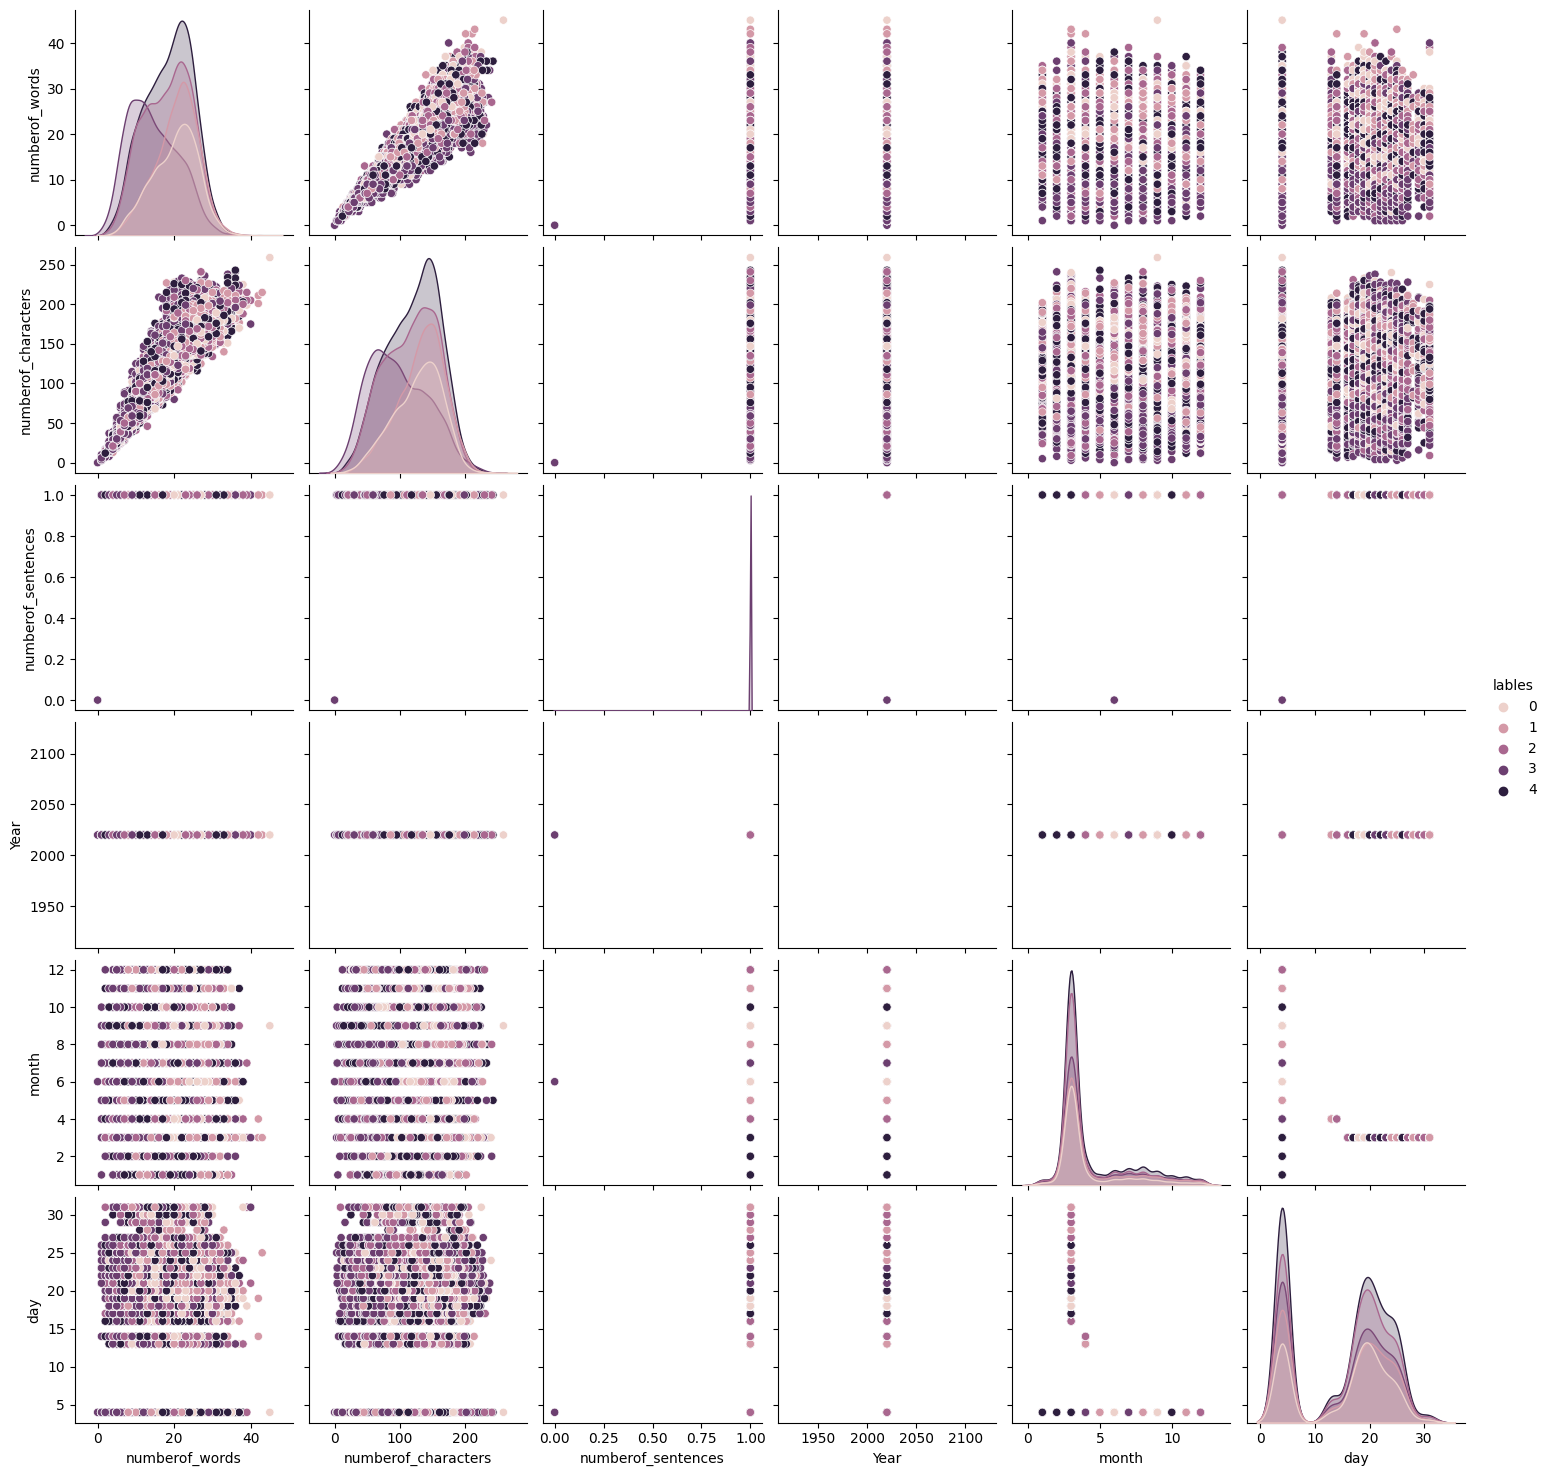

In [ ]:
sns.pairplot(df,hue='lables')

#below i m trying see the collinearity between target and indepenent variable

##above u can see date time is not that much important for target variable

In [ ]:
cor=df.corr()
cor_target =(cor["lables"])
cor_target

<ipython-input-35-20e93fe4068d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


numberof_words        -0.160934
numberof_characters   -0.126245
numberof_sentences    -0.002719
lables                 1.000000
Year                        NaN
month                  0.022025
day                   -0.017756
Name: lables, dtype: float64

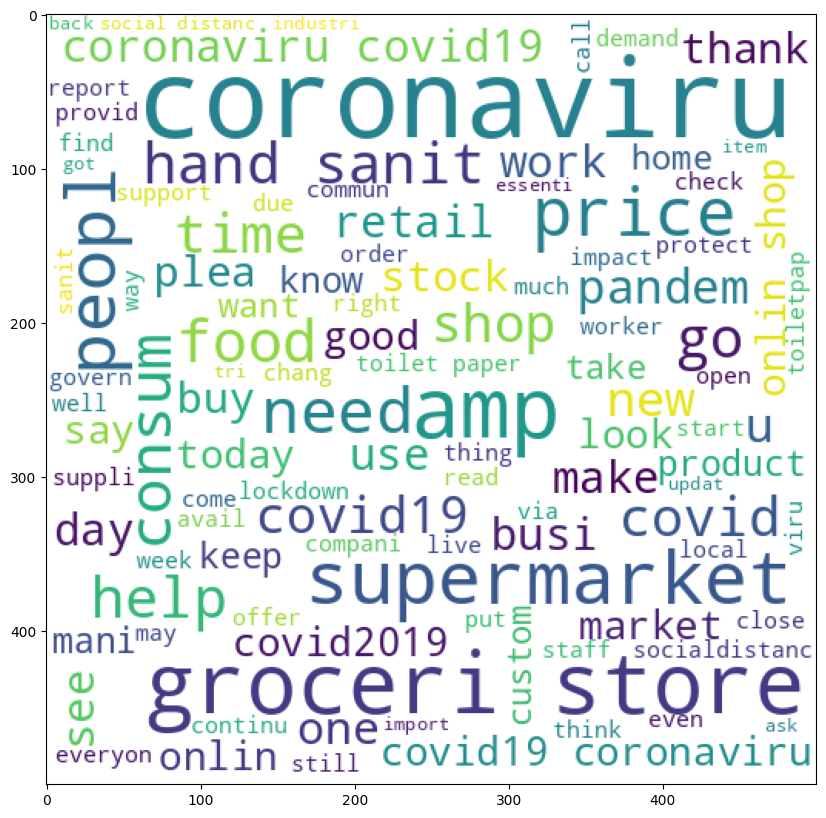

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
Neutral_tweets=wc.generate(df[df['lables'] == 4]['clean_tweets'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(Neutral_tweets)


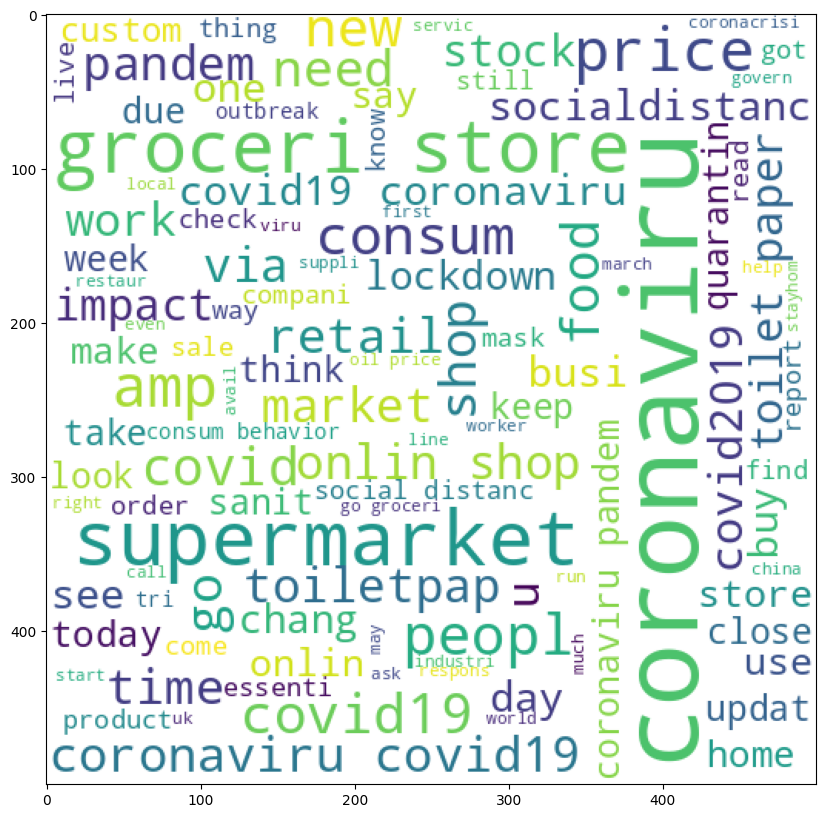

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
Positive_tweets=wc.generate(df[df['lables'] == 3]['clean_tweets'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(Positive_tweets)

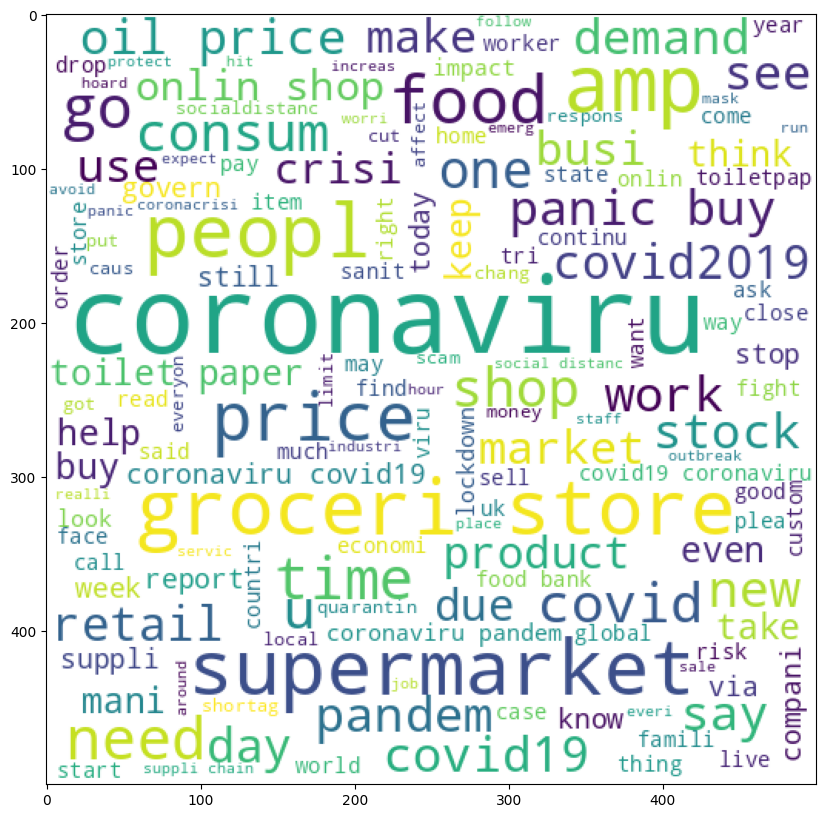

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
Extreme_postive=wc.generate(df[df['lables'] == 2]['clean_tweets'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(Extreme_postive)

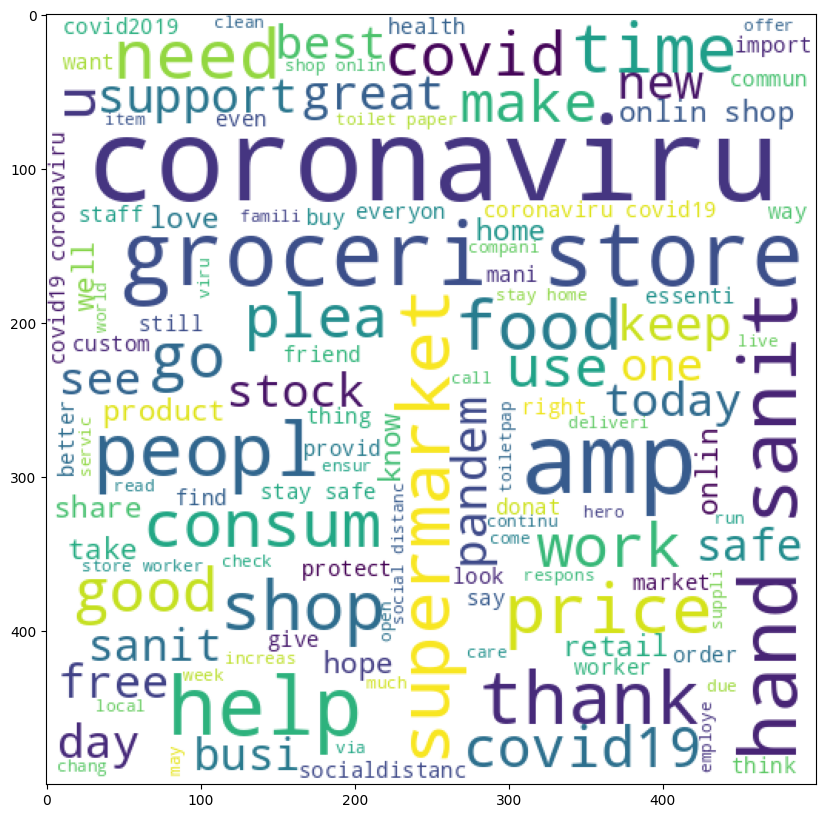

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
Extreme_Negative=wc.generate(df[df['lables'] == 1]['clean_tweets'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(Extreme_Negative)

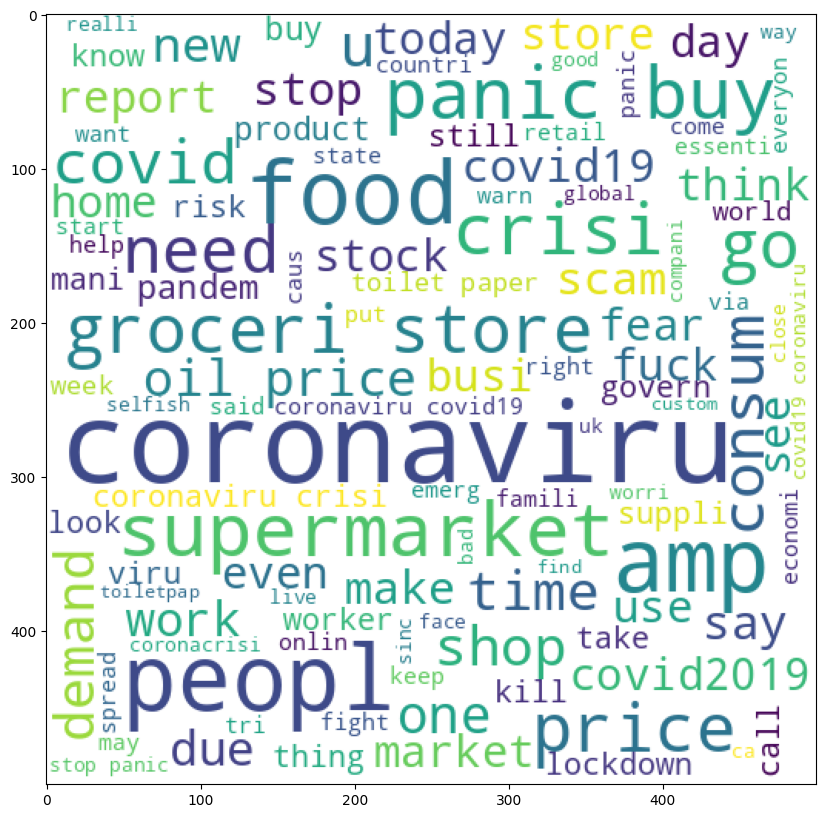

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
Negative=wc.generate(df[df['lables'] == 0]['clean_tweets'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(Negative)

##Number of words is somewhat important for target varible we can just drop other columns

In [ ]:
import matplotlib.pyplot as plt
df["labels"].value_counts().plot(kind='bar')
plt.show()


In [ ]:
df["lables"].value_counts().plot('bar')  ## 4 for  Positive              9110
## 2 Negative              7763
## 3Neutral               6172
## 1 Extremely Positive    5273
## 0 Extremely Negative    4249


4    9110
2    7763
3    6172
1    5273
0    4249
Name: lables, dtype: int64

##now building base model to predict the sentiment using tfidf vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [ ]:
x_train=tfidf.fit_transform(df['clean_tweets']).toarray()
y=df['lables'].values

y.shape

(32567,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(x_train,y,test_size=0.2,random_state=0)

##as this problem will work very well using probbailty so we can use naive bayes algorithm to classsify

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
acc=[]
prec=[]
recall=[]

In [ ]:
gauss = GaussianNB()
multi = MultinomialNB()
bino = BernoulliNB()
gauss.fit(X_train,y_train)
y_pred1 = gauss.predict(x_test)
print("accracy of model ",accuracy_score(y_test,y_pred1))
print("precision averageing using micro",precision_score(y_test,y_pred1,average='micro')) ## averageing using micro
print("recall_score",recall_score(y_test, y_pred1, average="micro"))
acc.append(accuracy_score(y_test,y_pred1))
prec.append(precision_score(y_test,y_pred1,average='micro'))
recall.append(precision_score(y_test,y_pred1,average='micro'))

accracy of model  0.3343567700337734
precision averageing using micro 0.3343567700337734
recall_score 0.3343567700337734


In [ ]:
multi.fit(X_train,y_train)
y_pred1 = multi.predict(x_test)
print("accracy of model ",accuracy_score(y_test,y_pred1))
print("precision averageing using micro",precision_score(y_test,y_pred1,average='micro')) ## averageing using micro
print("recall_score",recall_score(y_test, y_pred1, average="micro"))
acc.append(accuracy_score(y_test,y_pred1))
prec.append(precision_score(y_test,y_pred1,average='micro'))
recall.append(precision_score(y_test,y_pred1,average='micro'))


accracy of model  0.4504144918636782
precision averageing using micro 0.4504144918636782
recall_score 0.4504144918636782


In [ ]:
bino.fit(X_train,y_train)
y_pred1 = bino.predict(x_test)
print("accracy of model ",accuracy_score(y_test,y_pred1))
print("precision averageing using micro",precision_score(y_test,y_pred1,average='micro')) ## averageing using micro
print("recall_score",recall_score(y_test, y_pred1, average="micro"))
acc.append(accuracy_score(y_test,y_pred1))
prec.append(precision_score(y_test,y_pred1,average='micro'))
recall.append(precision_score(y_test,y_pred1,average='micro'))

accracy of model  0.4904820386859073
precision averageing using micro 0.4904820386859073
recall_score 0.4904820386859073


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
gauss = GaussianNB()
multi = MultinomialNB()
bino = BernoulliNB()
svc = SVC(kernel='rbf', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()

clfs = {
    'SVC' : svc,
    'KNN' : knc,
    'NB': mnb ,
    'gau':gauss
}

def best_classifier(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy,precision

In [ ]:
# best_classifier(svc,X_train,y_train,x_test,y_test)
knc.fit(X_train,y_train)
print("accracy of model ",accuracy_score(y_test,y_pred1))
print("precision averageing using micro",precision_score(y_test,y_pred1,average='micro')) ## averageing using micro
print("recall_score",recall_score(y_test, y_pred1, average="micro"))
acc.append(accuracy_score(y_test,y_pred1))
prec.append(precision_score(y_test,y_pred1,average='micro'))
recall.append(recall_score(y_test,y_pred1,average='micro'))

accracy of model  0.4904820386859073
precision averageing using micro 0.4904820386859073
recall_score 0.4904820386859073


In [ ]:
X_train.shape

(26053, 3000)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=100, random_state=0,)
clf.fit(X_train, y_train)
y_pred1=clf.predict(x_test)
print("accracy of model ",accuracy_score(y_test,y_pred1))
print("precision averageing using micro",precision_score(y_test,y_pred1,average='micro')) ## averageing using micro
print("recall_score",recall_score(y_test, y_pred1, average="micro"))
acc.append(accuracy_score(y_test,y_pred1))
prec.append(precision_score(y_test,y_pred1,average='micro'))
recall.append(precision_score(y_test,y_pred1,average='micro'))


accracy of model  0.4944734418176236
precision averageing using micro 0.4944734418176236
recall_score 0.4944734418176236


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
y_pred1=clf.predict(x_test)
print("accracy of model ",accuracy_score(y_test,y_pred1))
print("precision averageing using micro",precision_score(y_test,y_pred1,average='micro')) ## averageing using micro
print("recall_score",recall_score(y_test, y_pred1, average="micro"))
acc.append(accuracy_score(y_test,y_pred1))
prec.append(precision_score(y_test,y_pred1,average='micro'))
recall.append(precision_score(y_test,y_pred1,average='micro'))

accracy of model  0.4823457169174087
precision averageing using micro 0.4823457169174087
recall_score 0.4823457169174087


##now lets see using svm how , its performing well then other classifier

In [ ]:
svc = SVC(kernel='rbf', gamma=1.0)

##lets see uisng N grams to preserve the context,and exatct context correctly

In [ ]:
x=df['clean_tweets']
y=df['lables']


In [ ]:
y.shape

(32567,)

In [ ]:
x.shape

(32567,)

In [ ]:
from sklearn.model_selection import train_test_split
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_trn.shape

(26053,)

In [ ]:
y_trn.shape

(26053,)

##below doing experiment using N grams to check optimise value of N

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [ ]:
for N in range(1,10):
    # convert training data to bag of words
    cv = CountVectorizer(analyzer = 'word',ngram_range=(1,N), stop_words='english')
    X_train_cv = cv.fit_transform(x_trn)
    X_test_cv = cv.transform(x_tst)
    # train model and generate predictions
    clf = AdaBoostClassifier(n_estimators=100, random_state=0,)
    clf.fit( X_train_cv, y_trn)
    y_pred=clf.predict(X_test_cv)

    # compute f-1 score
    score = np.round(f1_score(y_tst, y_pred, average='micro'),4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1,N), score))

F-1 score of model with n-gram range of (1, 1): 0.4998
F-1 score of model with n-gram range of (1, 2): 0.4991
F-1 score of model with n-gram range of (1, 3): 0.4991
F-1 score of model with n-gram range of (1, 4): 0.4991
F-1 score of model with n-gram range of (1, 5): 0.4991
F-1 score of model with n-gram range of (1, 6): 0.4991
F-1 score of model with n-gram range of (1, 7): 0.4991
F-1 score of model with n-gram range of (1, 8): 0.4991
F-1 score of model with n-gram range of (1, 9): 0.4991


In [ ]:
for N in range(1,4):
    # convert training data to bag of words
    cv = TfidfVectorizer(analyzer = 'word',ngram_range=(N,N), stop_words='english')
    X_train_cv = cv.fit_transform(x_trn)
    X_test_cv = cv.transform(x_tst)
    # train model and generate predictions
    clf = MultinomialNB()
    clf.fit(X_train_cv, y_trn)
    y_pred = clf.predict(X_test_cv)

    # compute f-1 score
    score = np.round(f1_score(y_tst, y_pred, average='micro'),4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1,N), score))

F-1 score of model with n-gram range of (1, 1): 0.3684
F-1 score of model with n-gram range of (1, 2): 0.3669
F-1 score of model with n-gram range of (1, 3): 0.3483


In [ ]:
for N in range(1,5):
    # convert training data to bag of words
    cv = TfidfVectorizer(analyzer = 'word',ngram_range=(1,N), stop_words='english')
    X_train_cv = cv.fit_transform(x_trn)
    X_test_cv = cv.transform(x_tst)
    # train model and generate predictions
    bino.fit(X_train_cv, y_trn)
    clf.fit(X_train_cv, y_trn)
    y_pred = clf.predict(X_test_cv)
    # compute f-1 score
    score = np.round(f1_score(y_tst, y_pred, average='micro'),4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1,N), score))

F-1 score of model with n-gram range of (1, 1): 0.3684
F-1 score of model with n-gram range of (1, 2): 0.3578
F-1 score of model with n-gram range of (1, 3): 0.3592
F-1 score of model with n-gram range of (1, 4): 0.3594


##so u can see above n grams aos not giving good f1_score

#  ensemble technique giving,very less  accuracy   

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
tree.fit(X_train, y_train)
y_pred1=tree.predict(x_test)

print("accracy of model ",accuracy_score(y_test,y_pred1))
print("precision averageing using micro",precision_score(y_test,y_pred1,average='micro')) ## averageing using micro
print("recall_score",recall_score(y_test, y_pred1, average="micro"))
acc.append(accuracy_score(y_test,y_pred1))
prec.append(precision_score(y_test,y_pred1,average='micro'))
recall.append(precision_score(y_test,y_pred1,average='micro'))


accracy of model  0.29889468836352473
precision averageing using micro 0.29889468836352473
recall_score 0.29889468836352473


In [ ]:
acc
acc.remove(acc[4])

In [ ]:
acc.remove(acc[4])

In [ ]:
prec
prec.remove(prec[4])

In [ ]:
recall
recall.remove(recall[4])

In [ ]:
len(recall)

6

In [ ]:
len(acc)

5

In [ ]:
len(acc)

5

In [ ]:
svc.fit(X_train, y_train)
y_pred1=svc.predict(x_test)
print("accracy of model ",accuracy_score(y_test,y_pred1))
print("precision averageing using micro",precision_score(y_test,y_pred1,average='micro')) ## averageing using micro
print("recall_score",recall_score(y_test, y_pred1, average="micro"))
acc.append(accuracy_score(y_test,y_pred1))
prec.append(precision_score(y_test,y_pred1,average='micro'))
recall.append(precision_score(y_test,y_pred1,average='micro'))

accracy of model  0.5871968068774946
precision averageing using micro 0.5871968068774946
recall_score 0.5871968068774946


In [ ]:
len(acc)
acc

[0.3343567700337734,
 0.4504144918636782,
 0.4904820386859073,
 0.4904820386859073,
 0.29889468836352473,
 0.5871968068774946]

In [ ]:
acc.append(0.4944734418176236)


In [ ]:
acc.append(0.4823457169174087)

In [ ]:
len(acc)

8

#precsiosin and recall was

In [ ]:
prec=acc

In [ ]:
recall=acc

In [ ]:
len(recall)


8

In [ ]:
recall

[0.3343567700337734,
 0.4504144918636782,
 0.4904820386859073,
 0.4904820386859073,
 0.29889468836352473,
 0.5871968068774946,
 0.4944734418176236,
 0.4823457169174087]

In [ ]:
model=['Gauss','Multi','Bino','KNN',"decsion tree","SVM","adaboost","gradient_boosting"]
df = pd.DataFrame(list(zip(model, acc,prec,recall,f1_score)),
			columns =['Model', 'accuracy','precsion','recall','f1_score'])
df


,Model,accuracy,precsion,recall,f1_score
0,Gauss,0.334357,0.334357,0.334357,0.334357
1,Multi,0.450414,0.450414,0.450414,0.450414
2,Bino,0.490482,0.490482,0.490482,0.490482
3,KNN,0.490482,0.490482,0.490482,0.490482
4,decsion tree,0.298895,0.298895,0.298895,0.369081
5,SVM,0.587197,0.587197,0.587197,0.396144
6,adaboost,0.494473,0.494473,0.494473,0.536861


<Axes: xlabel='Model', ylabel='accuracy'>

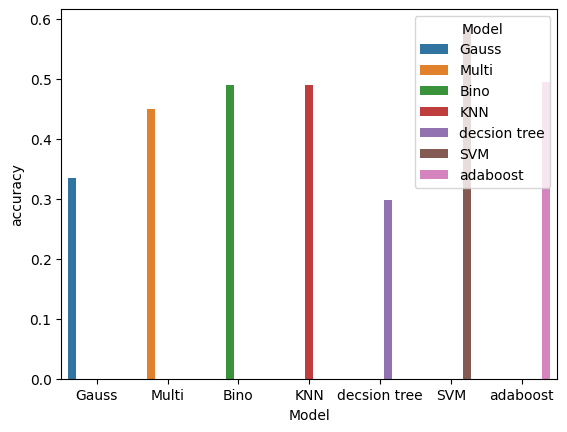

In [ ]:

import seaborn as sns
sns.barplot(y='accuracy',x='Model',hue='Model',data=df)


#by above u can see the SVM  model giving highest accuarcy prescion and accuracy which is 58.7% which will be our base model .

##extracting the tweets from ids